# Check annotations sinchronization

In [88]:
from spinco import *

import os
import pandas as pd
import numpy as np
import pyedflib
import pickle as pkl
from plotly import express as px
from matplotlib import pyplot as plt
import datetime

In [73]:
edfpath="D:\SpinCo\MASS\edfs"
annopath="D:\SpinCo\MASS\\annotations"
signalspath="D:\SpinCo\MASS\signals"

In [74]:
checkfiles={
    'psgbase':edfpath+"/01-02-0006 Base.edf",
    'psgpath':edfpath+"/01-02-0006 PSG.edf",
    'annobase':annopath+"/01-02-0006 Base.edf",
    'e1path':annopath+"/01-02-0006 Spindles_E1.edf",
    'e2path':annopath+"/01-02-0006 Spindles_E2.edf"
}

In [75]:
for name, edffile in checkfiles.items():
    print("*********************")
    print(name)
    signals, signal_headers, header = pyedflib.highlevel.read_edf(edffile)
    print(header['startdate'])
    reference=datetime.datetime(header['startdate'].year,header['startdate'].month,header['startdate'].day,0,0,0)
    print((reference-header['startdate']).total_seconds())
    print("*********************")

*********************
psgbase
2000-01-01 00:02:19
-139.0
*********************
*********************
psgpath
2000-01-01 00:02:19.008462
-139.008462
*********************
*********************
annobase
2000-01-01 00:02:19
-139.0
*********************
*********************
e1path
2000-01-01 00:02:19
-139.0
*********************
*********************
e2path
2000-01-01 00:02:19
-139.0
*********************


In [89]:
signals, annotations, signalsMetadata =loadMASSSpindles("D:\SpinCo\MASS",returnSignals=True)

In [93]:
aux=annotations[annotations.duration==np.max(annotations.duration)]
aux

,type,subjectId,startTime,duration,expert,comment,labelerId,samplerate,stopTime,startInd,stopInd
10027,spindle,0006,18638.413916,20.764296,E2,"<Event channel=""EEG C3-LER"" groupName=""spindle...",0002,256,18659.178212,4771434,4776750


In [90]:
signals['0006']

array([-0.75716793,  1.22311742,  2.55742733, ...,  7.89466697,
        5.90379187,  5.71317617])

In [99]:
aux.iloc[0].startInd

4771434

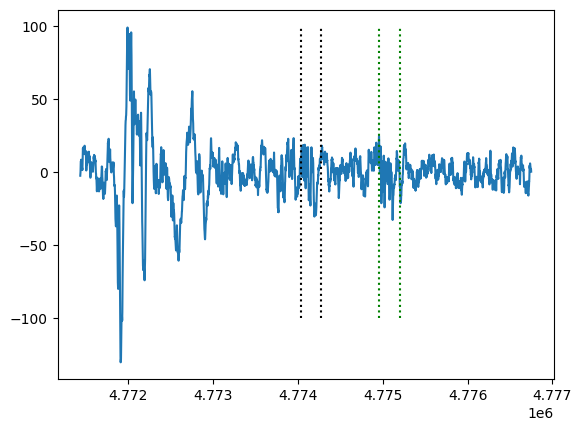

In [115]:
plt.plot(np.arange(aux.iloc[0].startInd,aux.iloc[0].stopInd),signals['0006'][aux.iloc[0].startInd:aux.iloc[0].stopInd])
plt.vlines([4774041,4774268],ymin=-100,ymax=100,linestyles=":",color='black')
plt.vlines([4774951,4775202],ymin=-100,ymax=100,linestyles=":",color='green')